In [1]:
#importing libraries
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.metrics import RootMeanSquaredError
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
%store -r corn_price_history_df
df = corn_price_history_df
df

,Date,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
1,2020-07-31,3.1500,3.1600,0.0025,0.079177,3.1500,3.1500,551566,64381.0,3.1575,3.1750,3.1450
2,2020-07-30,3.1575,3.1575,0.0025,0.079239,3.1575,3.1600,555042,104818.0,3.1550,3.1925,3.1525
3,2020-07-29,3.1550,3.1550,-0.0450,-1.406250,3.1550,3.1575,551611,118641.0,3.2000,3.2150,3.1525
4,2020-07-28,3.2025,3.2000,-0.0500,-1.538462,3.2000,3.2025,542505,96543.0,3.2300,3.2350,3.2000
5,2020-07-27,3.2550,3.2500,-0.0125,-0.383142,3.2525,3.2550,544625,83374.0,3.2525,3.2750,3.2325
...,...,...,...,...,...,...,...,...,...,...,...,...
500,2018-08-07,3.8475,3.8450,-0.0075,-0.194679,3.8450,3.8475,803169,202109.0,3.8525,3.8800,3.8325
501,2018-08-06,3.8500,3.8525,0.0100,0.260247,3.8475,3.8500,807913,98617.0,3.8450,3.8625,3.8250
502,2018-08-03,3.8425,3.8425,0.0300,0.786885,3.8425,3.8450,808689,123360.0,3.8125,3.8575,3.7900
503,2018-08-02,3.8175,3.8125,0.0175,0.461133,3.8150,3.8175,808149,246583.0,3.7975,3.8725,3.7925


In [3]:
df.index = df.pop('Date')
df.head()

,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
Date,,,,,,,,,,,
2020-07-31,3.1500,3.1600,0.0025,0.079177,3.1500,3.1500,551566,64381.0,3.1575,3.1750,3.1450
2020-07-30,3.1575,3.1575,0.0025,0.079239,3.1575,3.1600,555042,104818.0,3.1550,3.1925,3.1525
2020-07-29,3.1550,3.1550,-0.0450,-1.406250,3.1550,3.1575,551611,118641.0,3.2000,3.2150,3.1525
2020-07-28,3.2025,3.2000,-0.0500,-1.538462,3.2000,3.2025,542505,96543.0,3.2300,3.2350,3.2000
2020-07-27,3.2550,3.2500,-0.0125,-0.383142,3.2525,3.2550,544625,83374.0,3.2525,3.2750,3.2325


In [4]:
df = df.sort_values('Date')
df

,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
Date,,,,,,,,,,,
2018-08-01,3.8000,3.7950,0.0000,0.000000,3.7975,3.8025,817895,208725.0,3.8625,3.8725,3.7825
2018-08-02,3.8175,3.8125,0.0175,0.461133,3.8150,3.8175,808149,246583.0,3.7975,3.8725,3.7925
2018-08-03,3.8425,3.8425,0.0300,0.786885,3.8425,3.8450,808689,123360.0,3.8125,3.8575,3.7900
2018-08-06,3.8500,3.8525,0.0100,0.260247,3.8475,3.8500,807913,98617.0,3.8450,3.8625,3.8250
2018-08-07,3.8475,3.8450,-0.0075,-0.194679,3.8450,3.8475,803169,202109.0,3.8525,3.8800,3.8325
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,3.2550,3.2500,-0.0125,-0.383142,3.2525,3.2550,544625,83374.0,3.2525,3.2750,3.2325
2020-07-28,3.2025,3.2000,-0.0500,-1.538462,3.2000,3.2025,542505,96543.0,3.2300,3.2350,3.2000
2020-07-29,3.1550,3.1550,-0.0450,-1.406250,3.1550,3.1575,551611,118641.0,3.2000,3.2150,3.1525


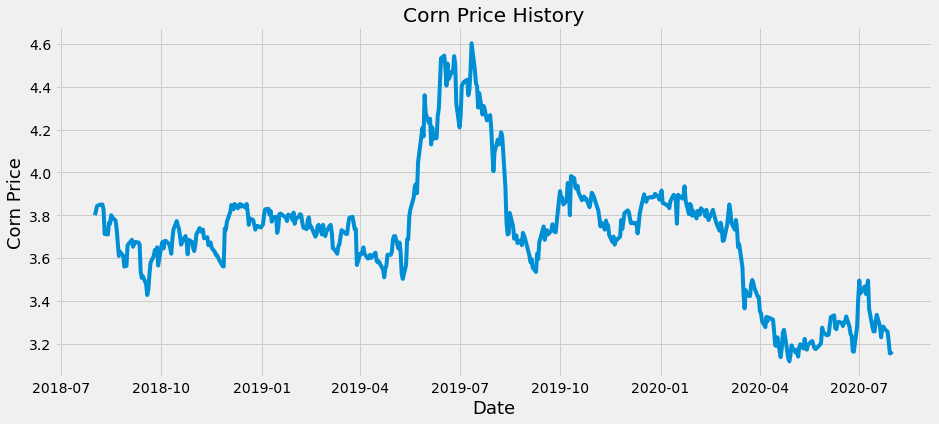

In [5]:
#Visualise data
plt.figure(figsize = (14,6))
plt.title('Corn Price History')
plt.plot(df['Last'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Corn Price', fontsize = 18)
plt.show()

In [6]:
#Create a new dataframe
last = df.filter(['Last'])
#Convert to np.array
np_last = last.values
#Get the number of rows to train the model
training_data_len = math.ceil(len(np_last) * .8)

training_data_len

404

In [7]:
np_last.shape

(504, 1)

In [8]:
#Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np_last)

scaled_data

array([[ 0.29447966],
       [ 0.35404076],
       [ 0.43912805],
       [ 0.46465423],
       [ 0.45614551],
       [ 0.46465423],
       [ 0.37956695],
       [-0.00332583],
       [-0.01183456],
       [ 0.17535747],
       [ 0.15834001],
       [ 0.29447966],
       [ 0.26044475],
       [ 0.20939238],
       [ 0.07325272],
       [-0.14797422],
       [-0.3521837 ],
       [-0.28411387],
       [-0.3521837 ],
       [-0.52235827],
       [-0.50534081],
       [-0.51384954],
       [-0.18200913],
       [-0.09692185],
       [-0.20753532],
       [-0.16499167],
       [-0.13095676],
       [-0.13946549],
       [-0.16499167],
       [-0.60744555],
       [-0.70104157],
       [-0.67551538],
       [-0.80314631],
       [-0.97332088],
       [-0.88823359],
       [-0.6499892 ],
       [-0.46279717],
       [-0.3521837 ],
       [-0.25858769],
       [-0.30964006],
       [-0.21604404],
       [-0.50534081],
       [-0.19051786],
       [-0.13095676],
       [-0.2330615 ],
       [-0

In [9]:
#Create training dataset
#Create scaled dataset
train_data = scaled_data[0:training_data_len, :]
#Split data in x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()
    

[array([ 0.29447966,  0.35404076,  0.43912805,  0.46465423,  0.45614551,
        0.46465423,  0.37956695, -0.00332583, -0.01183456,  0.17535747,
        0.15834001,  0.29447966,  0.26044475,  0.20939238,  0.07325272,
       -0.14797422, -0.3521837 , -0.28411387, -0.3521837 , -0.52235827,
       -0.50534081, -0.51384954, -0.18200913, -0.09692185, -0.20753532,
       -0.16499167, -0.13095676, -0.13946549, -0.16499167, -0.60744555,
       -0.70104157, -0.67551538, -0.80314631, -0.97332088, -0.88823359,
       -0.6499892 , -0.46279717, -0.3521837 , -0.25858769, -0.30964006,
       -0.21604404, -0.50534081, -0.19051786, -0.13095676, -0.2330615 ,
       -0.1139393 , -0.1139393 , -0.16499167, -0.22455277, -0.31814879,
       -0.08841312,  0.064744  ,  0.20088365,  0.13281382,  0.08176145,
       -0.03736075, -0.1735004 , -0.06288693, -0.03736075, -0.10543057])]
[-0.3266575148622549]

[array([ 0.29447966,  0.35404076,  0.43912805,  0.46465423,  0.45614551,
        0.46465423,  0.37956695, -0.0

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((344, 60), (344,))

In [11]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(344, 60, 1)

In [12]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

In [13]:
#Compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=[RootMeanSquaredError()])

In [14]:
history = model.fit(x_train,y_train, batch_size = 5, epochs = 5, validation_split=0.2, shuffle = True)

Epoch 1/5
55/55 [==============================] - 6s 56ms/step - loss: 0.3020 - root_mean_squared_error: 0.5496 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1695
Epoch 2/5
55/55 [==============================] - 2s 34ms/step - loss: 0.1143 - root_mean_squared_error: 0.3382 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1891
Epoch 3/5
55/55 [==============================] - 2s 32ms/step - loss: 0.1008 - root_mean_squared_error: 0.3175 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1698
Epoch 4/5
55/55 [==============================] - 2s 29ms/step - loss: 0.0797 - root_mean_squared_error: 0.2823 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1917
Epoch 5/5
55/55 [==============================] - 2s 32ms/step - loss: 0.0858 - root_mean_squared_error: 0.2930 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1734


In [15]:
#Create testing dataset
#Create a new array
test_data = scaled_data[training_data_len - 60: , :]
#Create datasets x_test, y_test
x_test = []
y_test = np_last[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [16]:
x_test = np.array(x_test)
x_test.shape, y_test.shape

((100, 60), (100, 1))

In [17]:
#get the model's predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 1s 16ms/step


C:\Users\tusha\AppData\Local\Temp\ipykernel_24932\2856405104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


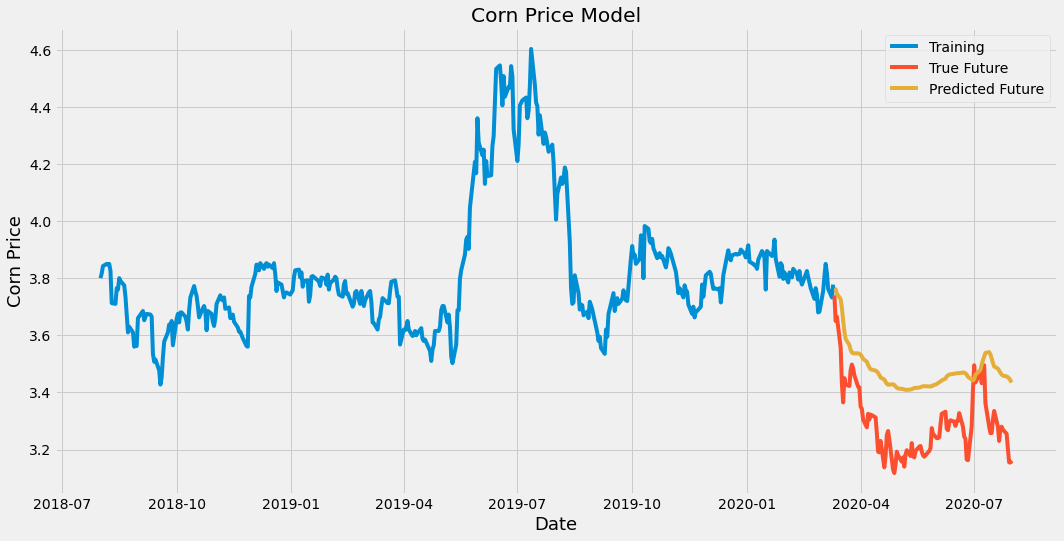

In [21]:
#plot the data
train = last[:training_data_len]
valid = last[training_data_len:]
valid['Predictions'] = predictions

#Visualise
plt.figure(figsize = (16,8))
plt.title('Corn Price Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Corn Price', fontsize = 18)
plt.plot(train['Last'])
plt.plot(valid[['Last', 'Predictions']])
plt.legend(['Training', 'True Future', 'Predicted Future'], loc = 'upper right')
plt.show()

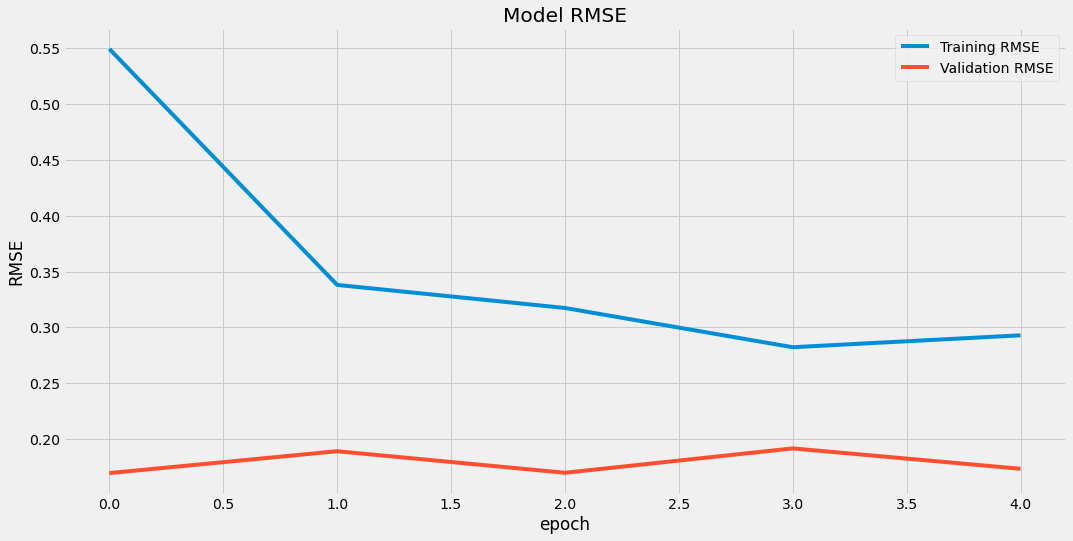

In [23]:
#Testing RMSE
plt.figure(figsize = (16,8))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['Training RMSE', 'Validation RMSE'], loc='upper right')
plt.show()

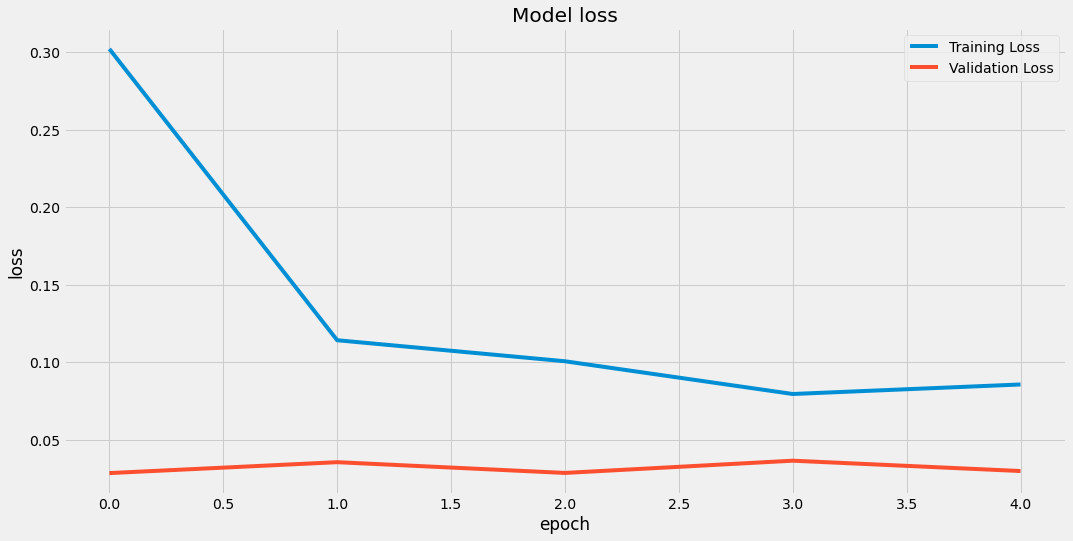

In [22]:
#Visualizing loss
plt.figure(figsize = (16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()